In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

2025-03-24 09:31:36.025952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742808696.173294    9613 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742808696.212152    9613 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742808696.540568    9613 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742808696.540589    9613 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742808696.540591    9613 computation_placer.cc:177] computation placer alr

In [3]:
from keras import backend as K
print(K.backend())

tensorflow


In [4]:
# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(1024, activation="relu")(inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

I0000 00:00:1742808701.465559    9613 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape(50000, 3072).astype("float32") / 255
x_test = x_test.reshape(10000, 3072).astype("float32") / 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 62s 0us/step


In [7]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [8]:
history = model.fit(x_train, y_train, batch_size=500, epochs=15, validation_split=0.2)

Epoch 1/15


I0000 00:00:1742808769.651296    9706 service.cc:152] XLA service 0x7f816800af90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742808769.651347    9706 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-03-24 09:32:49.701882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742808769.881054    9706 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-24 09:32:50.880230: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_160', 212 bytes spill stores, 244 bytes spill loads

2025-03-24 09:32:51.275676: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_160'

20/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1171 - loss: 2.8711

I0000 00:00:1742808777.723403    9706 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.1773 - loss: 2.4268 - val_accuracy: 0.3333 - val_loss: 1.8788
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3437 - loss: 1.8298 - val_accuracy: 0.3818 - val_loss: 1.7330
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3927 - loss: 1.7017 - val_accuracy: 0.3918 - val_loss: 1.7156
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4135 - loss: 1.6412 - val_accuracy: 0.4279 - val_loss: 1.6182
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4383 - loss: 1.5815 - val_accuracy: 0.4404 - val_loss: 1.5687
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4559 - loss: 1.5292 - val_accuracy: 0.4508 - val_loss: 1.5533
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4716 - loss: 1.4814 - val_accuracy: 0.4478 - val_loss: 1.5618
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4662 - loss: 1.4851 - val_accuracy: 0.4529 - val_loss: 1.5343
E

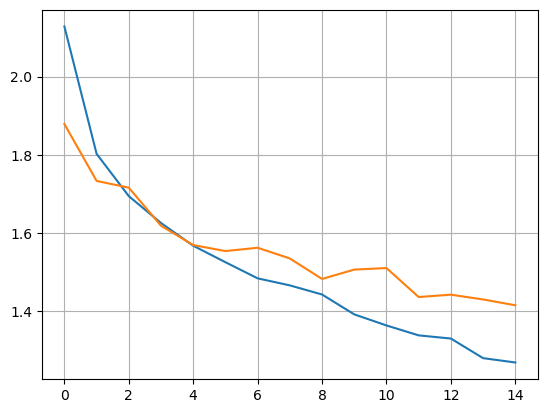

In [9]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [10]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

2025-03-24 09:33:08.476060: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_26_0', 468 bytes spill stores, 1028 bytes spill loads

2025-03-24 09:33:08.545208: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_26', 488 bytes spill stores, 488 bytes spill loads

2025-03-24 09:33:08.731097: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_26', 608 bytes spill stores, 608 bytes spill loads

2025-03-24 09:33:08.757000: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_26', 80 bytes spill stores, 144 bytes spill loads

2025-03-24 09:33:08.816931: I external

313/313 - 6s - 20ms/step - accuracy: 0.5137 - loss: 1.3960
Test loss: 1.3960365056991577
Test accuracy: 0.513700008392334


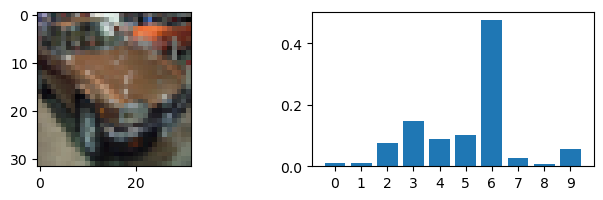

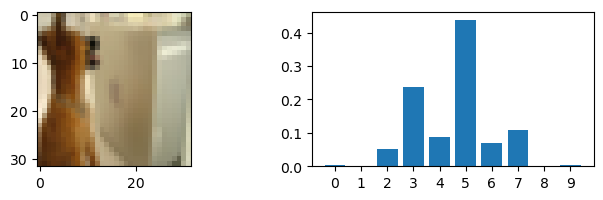

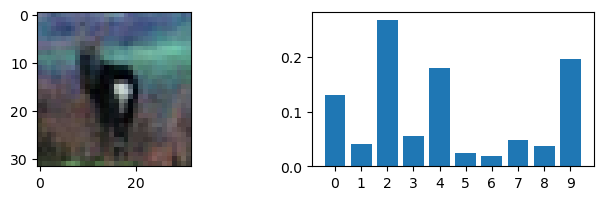

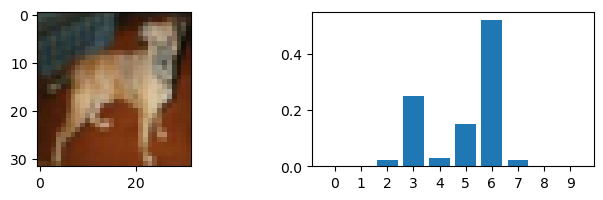

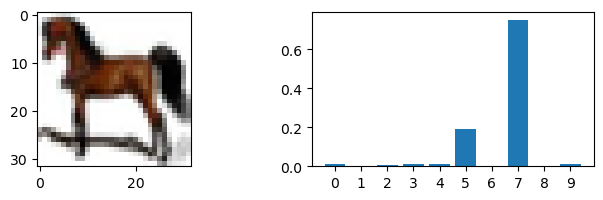

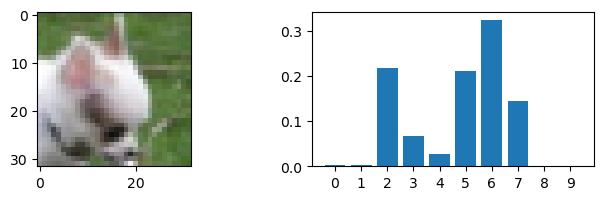

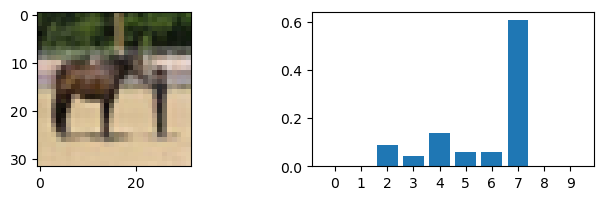

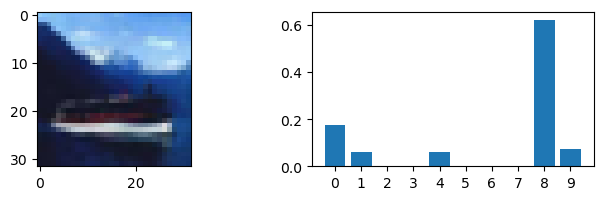

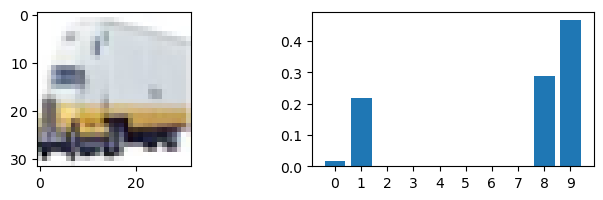

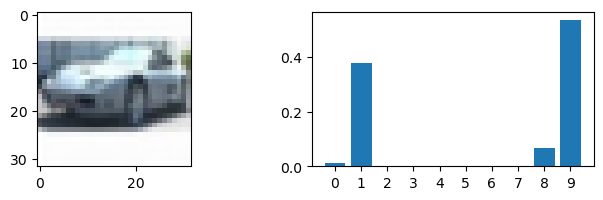

In [11]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32,3)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.bar(ind, y[start+k].numpy().flatten())
    plt.xticks(range(10))